# Settings & Initialisation

In [1]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

from comtrade.analysis import Analysis
tta = Analysis()

## Reporter Area

In [2]:
from comtrade.code.reporter_area import ReporterArea
reporter_area = ReporterArea()
reporter_area_ids = reporter_area.get_ids("India")
reporter_area_ids

[{'id': '699', 'text': 'India'}, {'id': '356', 'text': 'India, excl. Sikkim'}]

## Partner Area

In [3]:
from comtrade.code.partner_area import PartnerArea
partner_area = PartnerArea()
partner_area_ids = partner_area.get_ids("Japan")
partner_area_ids

[{'id': '392', 'text': 'Japan'}]

## Trade Regime

In [4]:
from comtrade.code.trade_regime import TradeRegime
trade_regime = TradeRegime()
trade_regime_ids = trade_regime.get_ids("Export")
trade_regime_ids

[{'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}]

## Data availability request

In [5]:
source = 699 # India
destination = 392 # Japan
tta.set_source_destination(source, destination)

# source_status = tta.source_data_available()
# print(source_status)
# destination_status = tta.destination_data_available()
# print(destination_status)

## Data request

In [6]:
data = tta.compare_export(2019, 'AG2')

{'r': 699, 'p': 392, 'rg': 2, 'ps': 2019, 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}
{'r': 392, 'p': 699, 'rg': 1, 'ps': 2019, 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


## Data Frame

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 5000)

In [8]:
df = pd.DataFrame.from_dict(data, orient='index')
df['value_diff'] = df['value_a'] - df['value_b']
df['quantity_diff'] = df['quantity_a'] - df['quantity_b']
df.sort_values(by=['value_diff'])
df

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff
03,03,"Fish and crustaceans, molluscs and other aquat...",0,No Quantity,419.05,0,No Quantity,428.98,-9.93,0
04,04,Dairy produce; birds' eggs; natural honey; edi...,0,No Quantity,5.15,0,No Quantity,3.83,1.32,0
05,05,Animal originated products; not elsewhere spec...,0,No Quantity,8.50,0,No Quantity,8.39,0.11,0
06,06,"Trees and other plants, live; bulbs, roots and...",0,No Quantity,2.15,0,No Quantity,2.97,-0.82,0
07,07,Vegetables and certain roots and tubers; edible,0,No Quantity,4.70,0,No Quantity,4.41,0.29,0
08,08,"Fruit and nuts, edible; peel of citrus fruit o...",0,No Quantity,69.01,0,No Quantity,72.43,-3.42,0
09,09,"Coffee, tea, mate and spices",0,No Quantity,44.13,0,No Quantity,48.88,-4.75,0
10,10,Cereals,0,No Quantity,5.44,0,No Quantity,5.83,-0.39,0
11,11,"Products of the milling industry; malt, starch...",0,No Quantity,2.53,0,No Quantity,2.24,0.29,0
12,12,Oil seeds and oleaginous fruits; miscellaneous...,0,No Quantity,10.10,0,No Quantity,13.52,-3.42,0


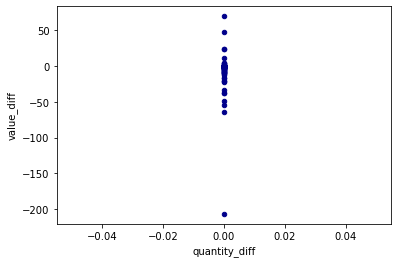

In [9]:
df.plot.scatter(x='quantity_diff', y='value_diff', c='DarkBlue')

## Reexport

In [10]:
rd = tta.api.get_data(392, 699, 3, 2019, aggregation = 'AG2')
rd

{'r': 392, 'p': 699, 'rg': 3, 'ps': 2019, 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


{'validation': {'status': {'name': 'Ok',
   'value': 0,
   'category': 0,
   'description': '',
   'helpUrl': 'For more reference visit http://comtrade.un.org/data/dev/portal/'},
  'message': None,
  'count': {'value': 0,
   'started': '2020-06-25T05:31:46.4689756+02:00',
   'finished': '2020-06-25T05:31:46.9857542+02:00',
   'durationSeconds': 0.5167786},
  'datasetTimer': {'started': '2020-06-25T05:31:46.4689756+02:00',
   'finished': '2020-06-25T05:31:47.4701169+02:00',
   'durationSeconds': 1.0011413}},
 'dataset': []}